# Regressão linear simples

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Carregando a base

In [2]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X = df['LSTAT'].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train_r = X_train.reshape(-1, 1)
X_test_r = X_test.reshape(-1, 1)

## `sklearn`

In [4]:
lr = LinearRegression()
lr.fit(X_train_r, y_train)

LinearRegression()

In [5]:
y_pred = lr.predict(X_test_r)

r2 = lr.score(X_test_r, y_test)
print(r2)

0.5429180422970386


In [6]:
print(lr.coef_)
print(lr.intercept_)

[-0.9665309]
34.8369498203185


## `scipy.stats`

In [7]:
slope, intercept, r, p, std_err = stats.linregress(
    X_train,
    y_train
)

slope, intercept

(-0.966530901950352, 34.836949820318495)

## Mínimos quadrados

In [8]:
X_train_s = np.vstack([X_train, np.ones(len(X_train))]).T

# lest squares
theta = np.linalg.inv(
    X_train_s.T.dot(X_train_s)).dot(X_train_s.T
).dot(y_train)

slope = theta[0]
intercept = theta[1]

slope, intercept

(-0.9665309019503525, 34.83694982031851)

## Gráfico

In [19]:
linear_function = lambda x, slope=slope, intercept=intercept: slope*x + intercept

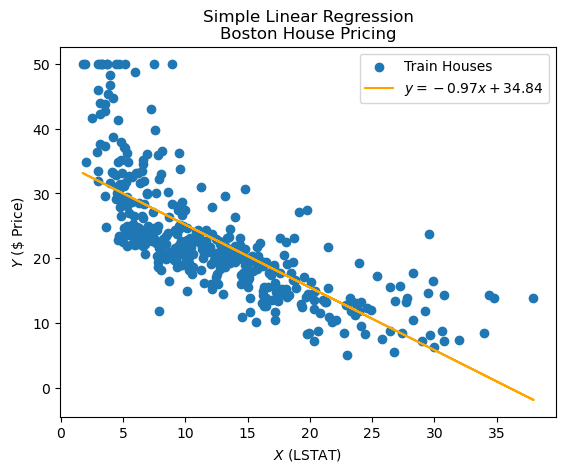

In [20]:
plt.title('Simple Linear Regression\nBoston House Pricing');
plt.xlabel('$X$ (LSTAT)');
plt.ylabel('$Y$ (\$ Price)');

plt.scatter(X_train, y_train, label='Train Houses');

plt.plot(
    X_train,
    linear_function(X_train),
    color='orange',
    label=f'$y = {round(slope, 2)}x + {round(intercept, 2)}$'
);

plt.legend();

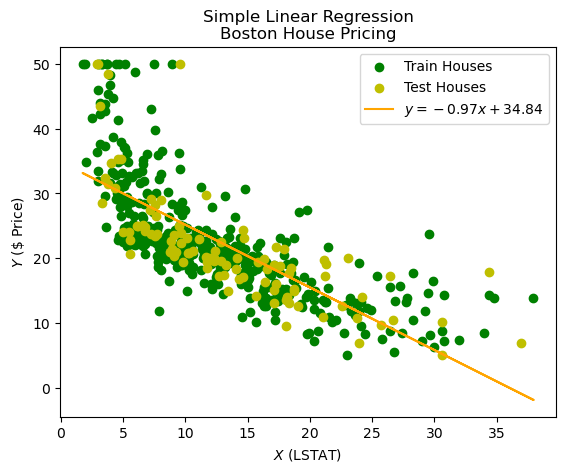

In [21]:
plt.title('Simple Linear Regression\nBoston House Pricing');
plt.xlabel('$X$ (LSTAT)');
plt.ylabel('$Y$ (\$ Price)');

plt.scatter(X_train, y_train, label='Train Houses', color='g');
plt.scatter(X_test, y_test, label='Test Houses', color='y');

plt.plot(
    X_train,
    linear_function(X_train),
    color='orange',
    label=f'$y = {round(slope, 2)}x + {round(intercept, 2)}$'
);

plt.legend();